# AlexNet Implementation in Keras


[Research Paper Link](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

![AlexNet Architecture](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/alexnet2.png)

## Setting Up the Project Directory in Google Drive

In [1]:
%cd /content/drive/MyDrive/Datasets/Flowers Dataset

/content/drive/MyDrive/Datasets/Flowers Dataset


## Unzipping the dataset

In [ ]:
#!unzip dataset.zip

## Imports

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Set paths (download the dataset and set the correct paths for Google Drive)

In [3]:
train_dir = '/content/drive/MyDrive/Datasets/Flowers Dataset/train'
test_dir = '/content/drive/MyDrive/Datasets/Flowers Dataset/test'

## Data Augmentation and Preprocessing

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


## Define the AlexNet model Architecture

In [5]:
model = Sequential()

# Layer 1: Convolutional + MaxPooling
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2: Convolutional + MaxPooling
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Convolutional
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 4: Convolutional
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 5: Convolutional + MaxPooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output for the Fully Connected layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(train_generator.num_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 35, 35, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 35, 35, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 17, 17, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 17, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,979,394 (114.36 MB)

 Trainable params: 29,978,690 (114.36 MB)

 Non-trainable params: 704 (2.75 KB)

## Model Compilation & Training

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 590s 15s/step - accuracy: 0.5510 - loss: 4.6528 - val_accuracy: 0.5769 - val_loss: 0.6845
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.6128 - loss: 0.6753 - val_accuracy: 0.6044 - val_loss: 0.6704


## Model Evaluation

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.6115 - loss: 0.6716
Test accuracy: 0.6043956279754639


## Model Saving

In [9]:
# Save the model
model.save('alexnet_custom_dataset_model.h5')

## Visualizing Loss & Accuracy

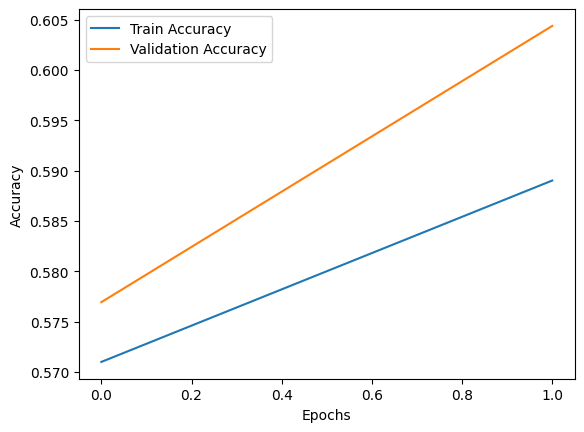

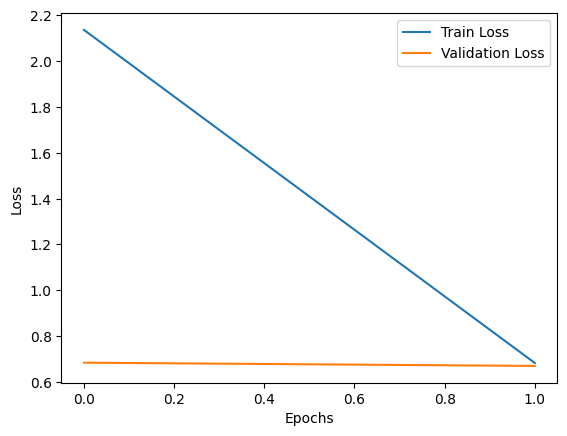

In [10]:
# Visualize Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Inferencing and Prediction

In [11]:
import numpy as np

# Prediction Code
def predict_image(model, image_path, class_names):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input

    # Predict the class probabilities
    prediction = model.predict(img_array)

    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction[0])

    # Get the predicted class name
    predicted_class = class_names[predicted_class_index]

    return predicted_class


# Class names (Make sure this matches your dataset classes)
class_names = ['daisy', 'dandelion'] # Update with your actual class names

# Example prediction
image_path = '/content/drive/MyDrive/Datasets/Flowers Dataset/test/dandelion/1297972485_33266a18d9_jpg.rf.27db91a578818f7158d6d5d98dbfdc8a.jpg'  # Replace with your image path
predicted_class = predict_image(model, image_path, class_names)
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: dandelion
